# Data Understanding

## Data Loading
Import Library

In [36]:
import zipfile, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Memasukkan dataset

In [37]:
local_zip = '/content/Stroke Prediction Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
len(stroke)
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Variabel-variabel pada Stroke Prediction Dataset

In [38]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [39]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Missing Value
Menghapus Missing Value pada kolom avg_glucos_level dan bmi

In [40]:
stroke['bmi'] = stroke['bmi'].replace(np.NaN, 0)
y = (stroke.avg_glucose_level == 0).sum()
z = (stroke.bmi == 0).sum()

print("Nilai 0 di kolom avg_glucose_level: ", y)
print("Nilai 0 di kolom bmi: ", z)


Nilai 0 di kolom avg_glucose_level:  0
Nilai 0 di kolom bmi:  201


In [41]:
stroke = stroke.loc[(stroke['bmi'] != 0)]
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Outliers

### Fitur Age

<Axes: xlabel='age'>

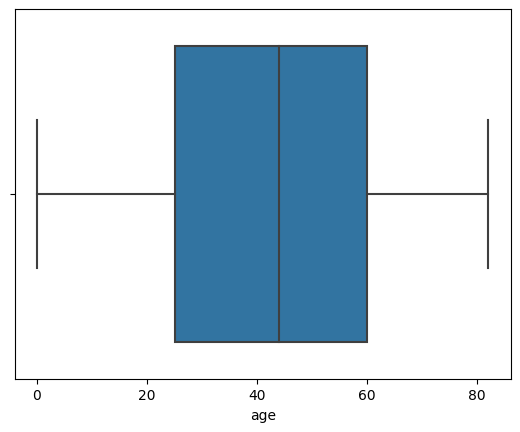

In [42]:
sns.boxplot(x=stroke['age'])

### Fitur avg_glucose_level

<Axes: xlabel='avg_glucose_level'>

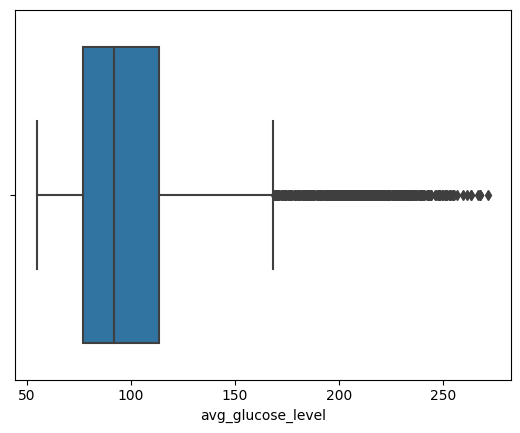

In [43]:
sns.boxplot(x=stroke['avg_glucose_level'])

### Fitur bmi

<Axes: xlabel='bmi'>

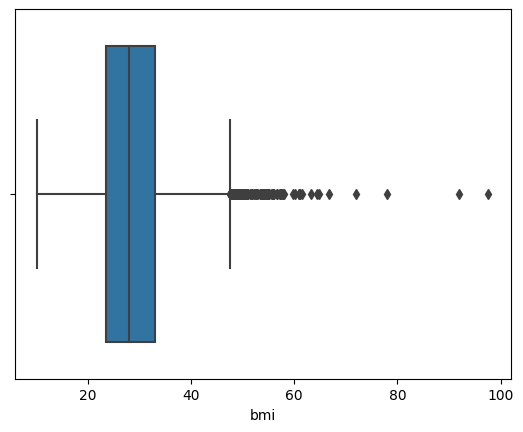

In [44]:
sns.boxplot(x=stroke['bmi'])

### Membuat batas bawah dan atas

In [64]:
Q1 = stroke.quantile(0.25)
Q3 = stroke.quantile(0.75)
IQR=Q3-Q1
stroke=stroke[~((stroke<(Q1-1.5*IQR))|(stroke>(Q3+1.5*IQR))).any(axis=1)]

stroke.shape

(1373, 22)

## Multivariate Analysis

In [46]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'work_type', 'Residence', 'smoking_status']

### Categorical Features

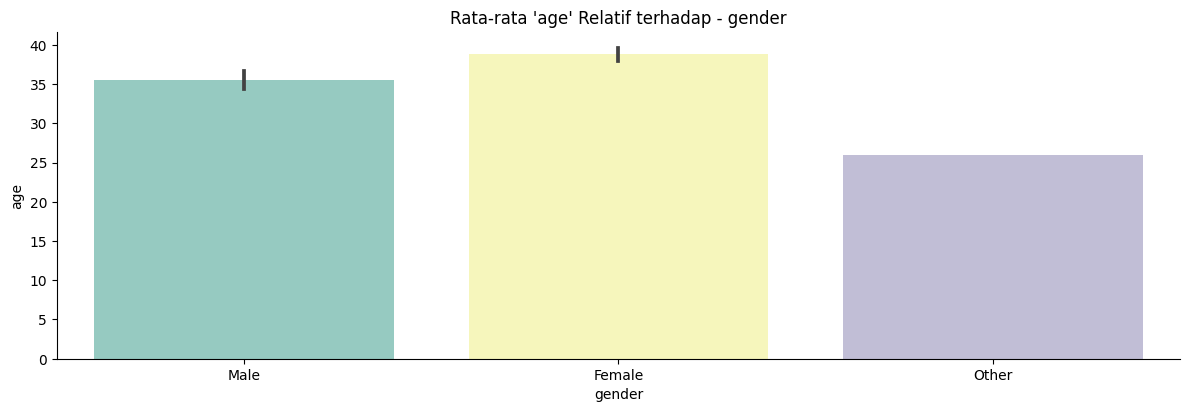

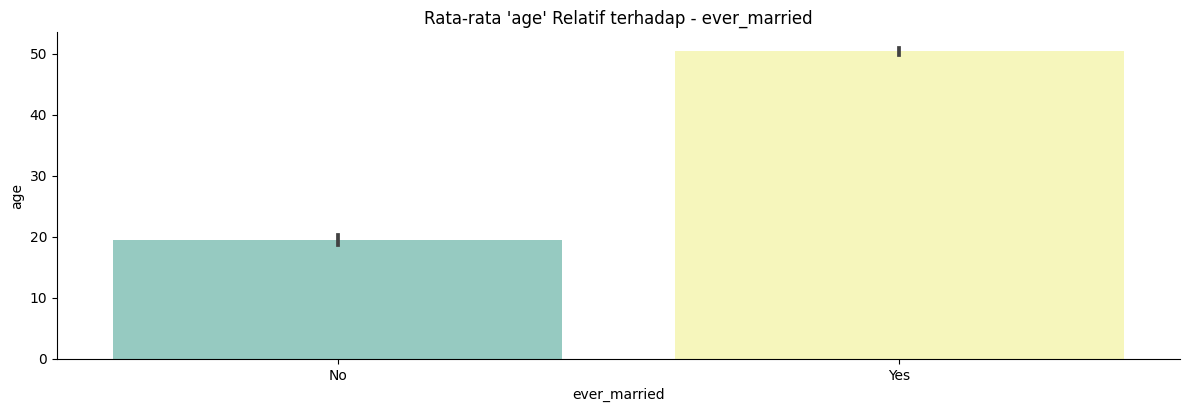

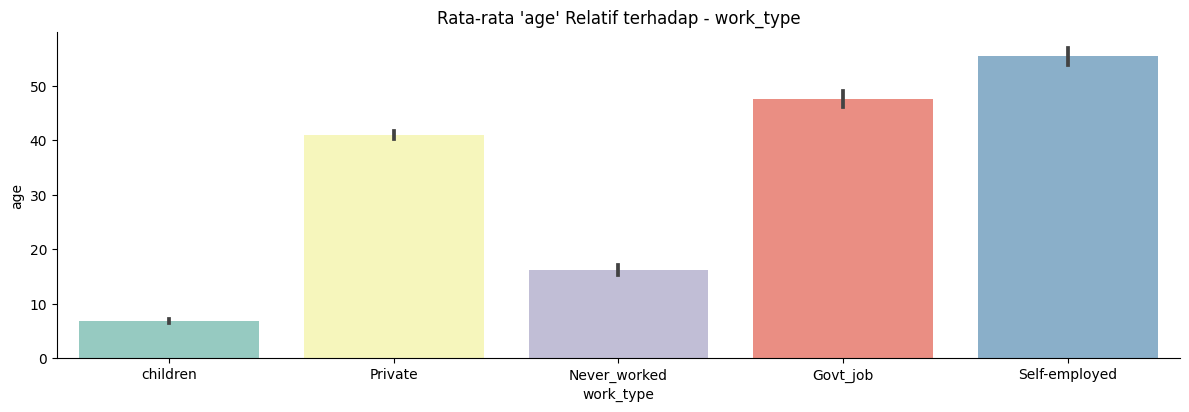

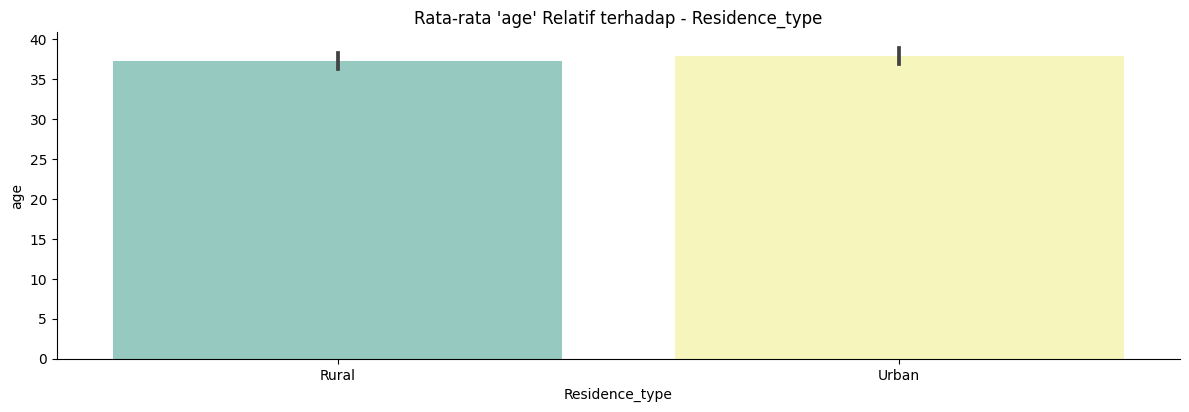

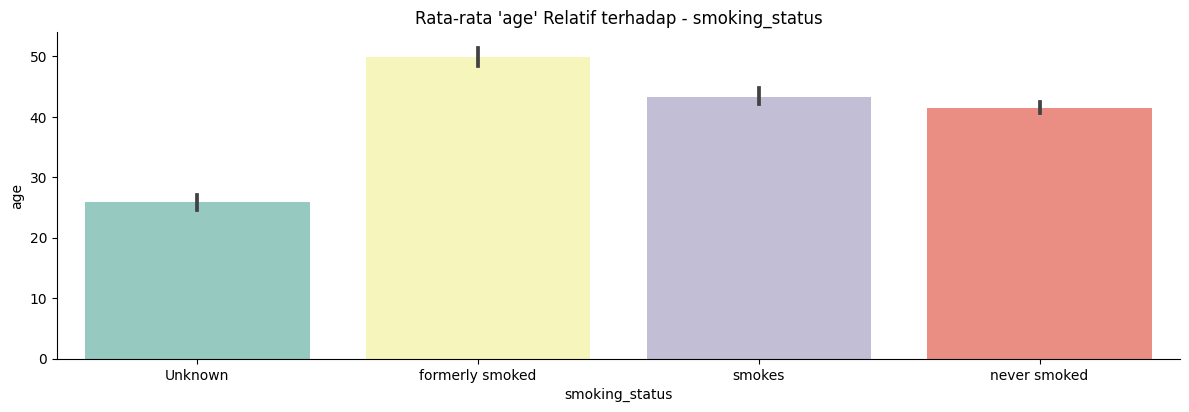

In [47]:
cat_features = stroke.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="age", kind="bar", dodge=False, height = 4, aspect = 3,  data=stroke, palette="Set3")
  plt.title("Rata-rata 'age' Relatif terhadap - {}".format(col))

### Numerical Features

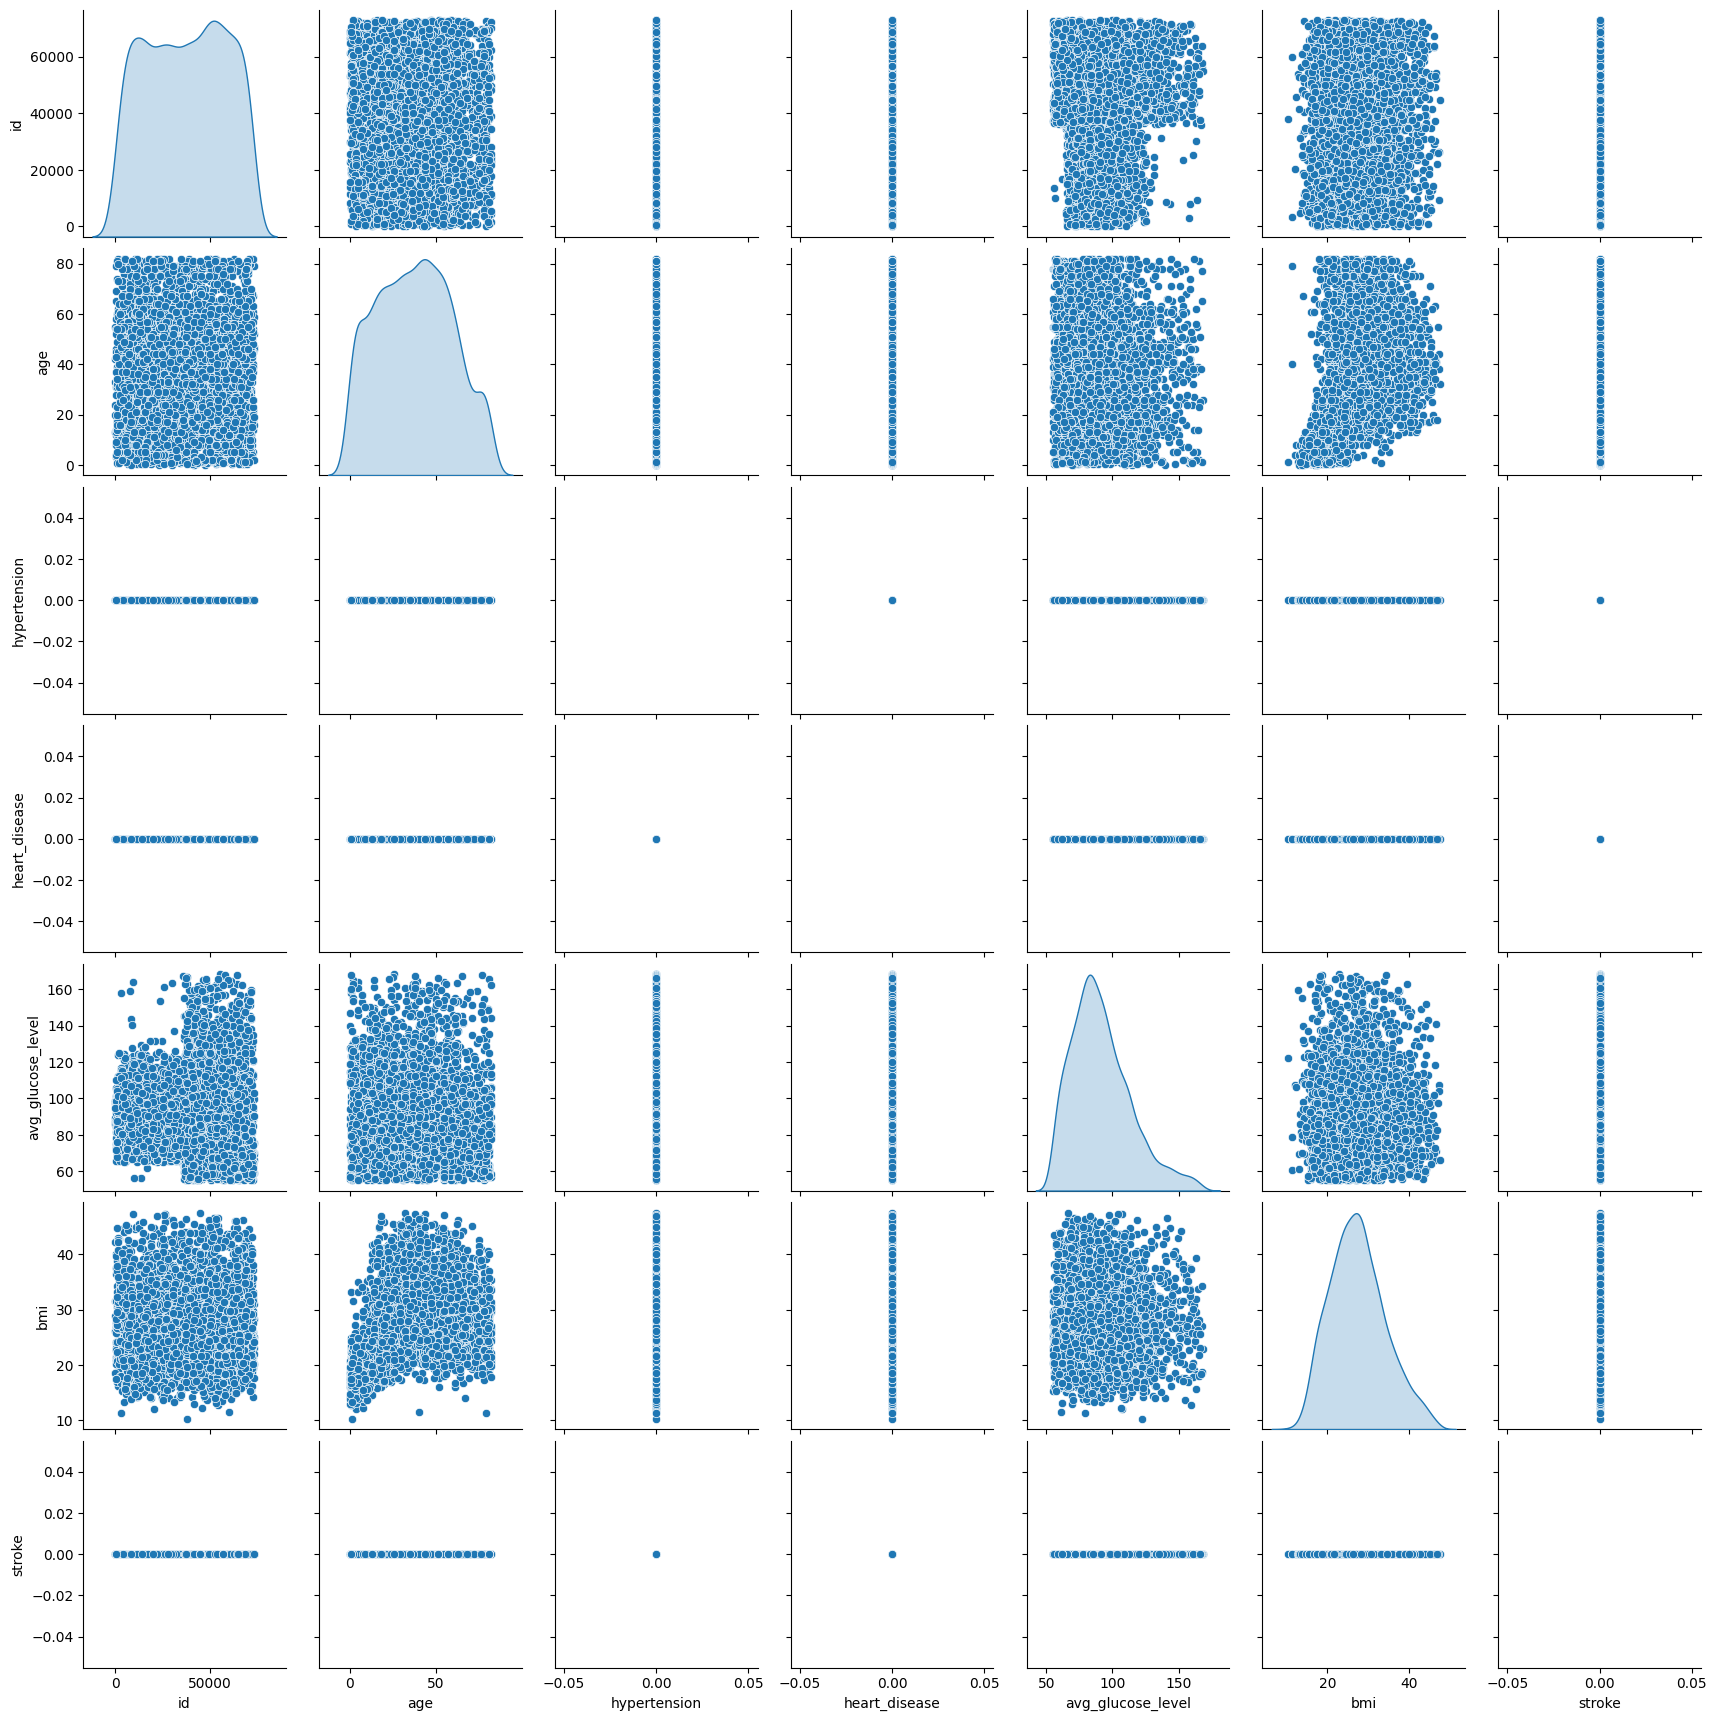

In [48]:
sns.pairplot(stroke, diag_kind = 'kde')

### Correlation Matrix

<ipython-input-49-b475048060e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = stroke.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

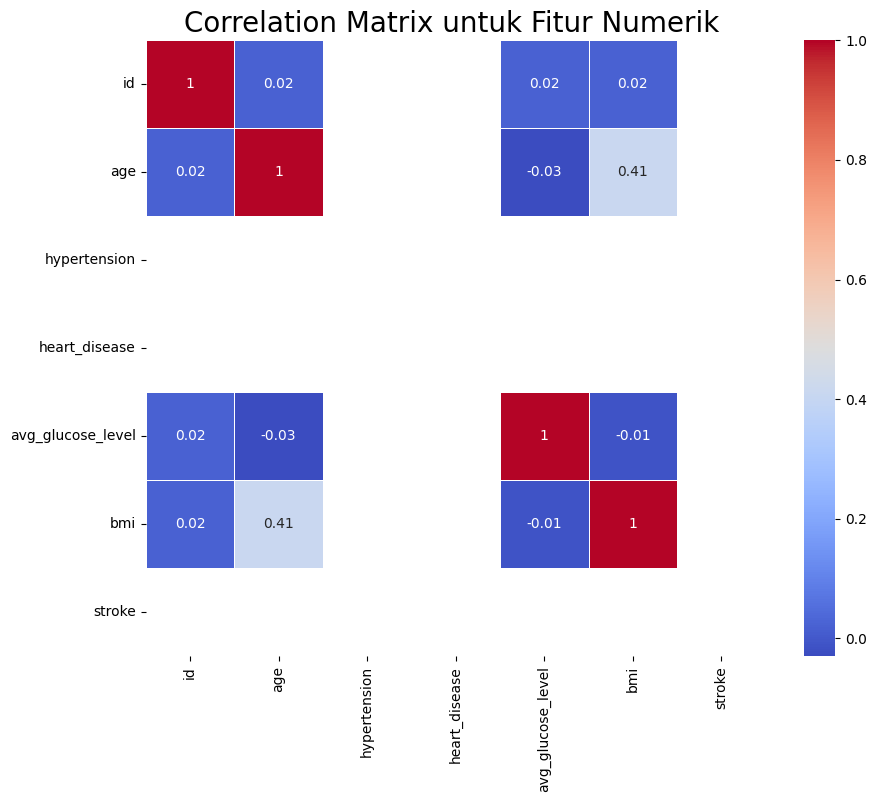

In [49]:
plt.figure(figsize=(10, 8))
correlation_matrix = stroke.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Data Preparation

In [50]:
stroke = stroke.drop(["id"], axis=1)
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
255,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Encoding Fitur Kategori

In [51]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for column in categorical_columns:
    dummies = pd.get_dummies(stroke[column], prefix=column)
    stroke = pd.concat([stroke, dummies], axis=1)
    stroke = stroke.drop(columns=column)


stroke['bmi'] = stroke['bmi'].replace(np.NaN, 0)

stroke

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,3.0,0,0,95.12,18.0,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
251,8.0,0,0,110.89,17.6,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
252,70.0,0,0,69.04,35.9,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
253,14.0,0,0,161.28,19.1,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
255,52.0,0,0,77.59,17.7,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,0,1,...,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


## Train-Test-Split

In [52]:
from sklearn.model_selection import train_test_split

x = stroke.drop(["age"], axis=1)
y = stroke["age"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [53]:
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 3755
Total # of sample in train dataset: 3004
Total # of sample in test dataset: 751


## Standarisasi

In [54]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['avg_glucose_level', 'bmi']
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
x_train[numerical_features].head()

,avg_glucose_level,bmi
520,-0.799319,2.571418
1814,-0.139998,0.750773
1938,-0.348437,-0.365105
1777,0.269374,-0.805584
1720,-0.916787,0.354343


In [55]:
x_train[numerical_features].describe().round(4)

,avg_glucose_level,bmi
count,3004.0000,3004.0000
mean,-0.0000,0.0000
std,1.0002,1.0002
min,-1.6026,-2.5235
25%,-0.7273,-0.7175
50%,-0.1561,-0.0715
75%,0.5585,0.6333
max,3.3889,2.9385


# Modeling

In [56]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## K-Nearest Neighbor

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(x_train), y_true=y_train)

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)

## Boosting Algorithm

In [59]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(x_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train), y_true=y_train)

# Evaluasi Model

In [60]:
x_test.loc[:, numerical_features] = scaler.transform(x_test[numerical_features])

In [61]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3

mse


,train,test
KNN,0.14536,0.18468
RF,0.038683,0.198566
Boosting,0.170451,0.168157


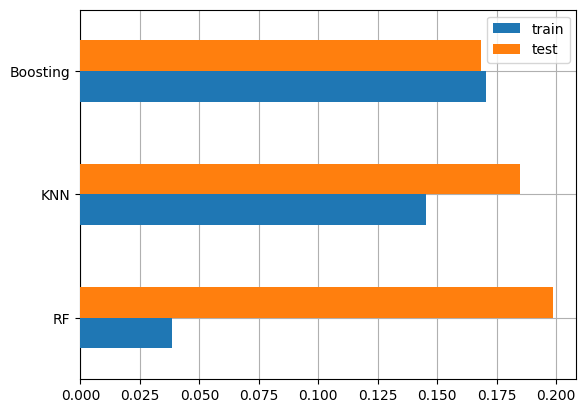

In [62]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [63]:
prediksi = x_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
3653,14.0,26.1,30.8,30.6
